<a href="https://colab.research.google.com/github/abelowska/dataPy/blob/main/Classes_07_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: Support Vector Machine

Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, balanced_accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="deep")

import io
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.svm import SVC
from sklearn.preprocessing import power_transform

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

In [ ]:
# constans
test_size=0.2
random_state=42

In [ ]:
def compute_score_classification(y_true, y_pred):
  '''
  Helper function for printing scores.

  Parameters:
  y_true: ndarray of y values from original dataset.
  y_pred: ndarray of y values predicted with given model.

  Return:
  dictionary object that consists of accuracy and classification report.

  '''
  return {
        "Accuracy": f"{accuracy_score(y_true, y_pred):.3f}",
        "Classification Report": classification_report(y_true, y_pred),
}

## Load dataset

In [ ]:
df = pd.read_csv('data_neo-ffi_religion.csv')
df['Orthodoxy'] = np.log(df[['Orthodoxy']].to_numpy())
df.head()

Inspect the dataset

In [ ]:
df.describe()

Create classes

In [ ]:
df['class'] = df[['External Critique', 'Orthodoxy', 'Relativism', 'Second Naïveté']].idxmax(axis=1)

In [ ]:
df.head()

## Exercise 1

Using the documentation, create simple SVM classification model: *class ~ Extraversion+ Agreeableness + Conscientiousness + Openness + Neuroticism*. Use [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class from sci-kit learn and do not forget to scale your data.

1. Compare classification results when using three different kernels: linear, polynomial, and radial.
2. Play with different C values: try to create a model with **hard margins** and **soft margins**. Consider what C-values can represent soft and hard margins.

In [ ]:
from sklearn.pipeline import make_pipeline

X = df[[
    'Extraversion',
    'Agreeableness',
    'Conscientiousness',
    'Openness',
    'Neuroticism'
    ]]

y = df[['class']]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Your code

## Exercise 2

When you created the KNN, DT, or SVC models - most of the code (actually all of it, except for the line defining the model) was the same. This is quite a waste of time and space. It also makes it difficult to read, analyze, and refactor the code. The [`Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) framework was created exactly for such situations. As sugested by the name, `Pipeline` is a pipe of transforms (functions that somehow transform the data) with a final estimator at the end. According to the documentation, intermediate steps of the pipeline must be *transforms*, that is, they must implement `fit` and `transform` methods (e.g., `StandardScaler`). The final estimator only needs to implement `fit` (e.g., `KNeighborsClassifier`). When you create a pipeline, you can think of this pipeline as a model - in fact, individual data processing steps are already a model, such as scaler, because they often learn from data.

For the sake of simplicity, we'll start with the [`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline) function, which conveniently allows you to create a pipeline. Take a look at the example below:

```
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
model.fit(X,y)
y_pred = model.predict(X)
```

Again, create SVC lassifiers, but this time:
1. Define classification estimators beforehand and put them in a list;
2. Use a for loop to ...
3. ... make pipeline that chain scaler with estimator using `make_pipeline()` function.

In [ ]:
# Your code

## Homework:

From the theory of SVM we know, that the kernel and C choice should influence the shape of decision boundaries. Let's see it with our own eyes.

To do so, we can use [`DecisionBoundaryDisplay.from_estimator()`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator) for plotting the decision boundary of given (fitted) estimator. Example:
```
classifier = SVC(kernel='rbf', C=100000).fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier,
    X,
    response_method="predict",
    xlabel=label_of_the_first_feature,
    ylabel=label_of_the_second_feature,
    alpha=0.5,
)
```
On a scaled data, my output is more or less like this:
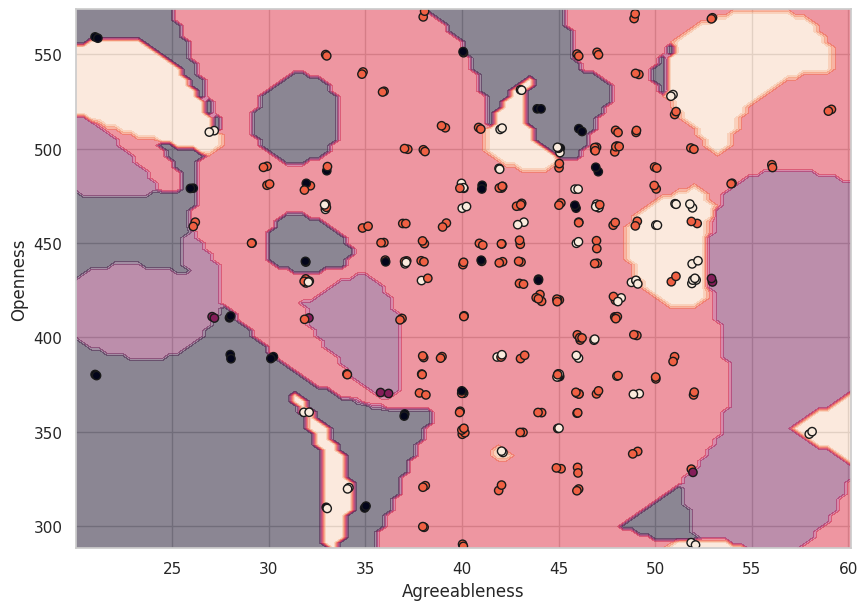


Note, that to use `DecisionBoundaryDisplay.from_estimator()` method we can use only two features during the fitting (to plot the boundaries in 2D plot).

The overall strategy will be as follows:

1. Choose **two features** from our set of five Big Five features (e.g. Openness and Agreeableness);
2. Encode y set. Until now the value of our y was a simple string (e.g. 'Relativism'). For convenient plotting of our boundaries and original data, we need our categorical y to be encoded as numbers (e.g. 0,1,2,3 and 4). You can use e.g. [`LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class. It implements classical `fit()-transform()` API, so you can `fit()` and `transform()` your y data;
3. Create train and tests datasets from X and encoded y;
4. Scale features dataset. You can do this 'manually' or use [`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline) function;
5. For 6 SVC models (3 kernels x 3 C), create `DecisionBoundaryDisplay()` based on the code and documentation provided. You can display decision boundaries for both training and test sets, or select just one set. For 'poly' kernel you can either pick the default `degree = 3` or test a higher degree;
6. Do not forget to add the original data as scatterplot (see exaples in the sklearn documentation) to the `DecisionBoundaryDisplay()`, to compare decision boundaries with the placement of the original data;
7. In your report include generated plots and comment **both** on the appearance of decision boundaries depending on the kernel chosen and the effect of margin softness on these boundaries.
----
8. If you want, you can check whether the boundaries differ when svm is trained on scaled and unscaled data.

In [ ]:
# Your code